# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


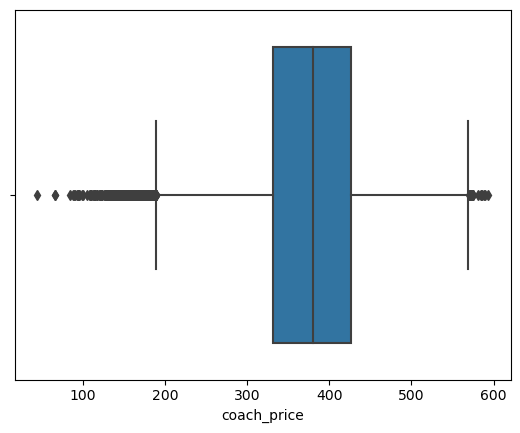

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


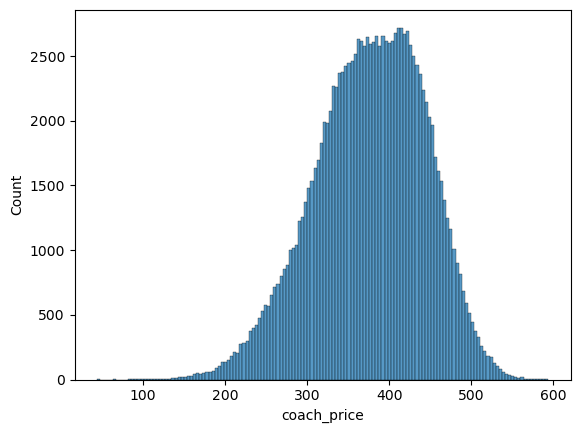

376.58525308213905
380.56


<Figure size 640x480 with 0 Axes>

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
## Task 1
print(flight.head())
# print(flight.coach_price.unique())
sns.boxplot(x='coach_price', data=flight)
plt.show()
plt.clf()

# sns.distplot(flight.coach_price, bins=100, kde=False)
sns.histplot(x='coach_price', data=flight)
plt.show()
plt.clf()

print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

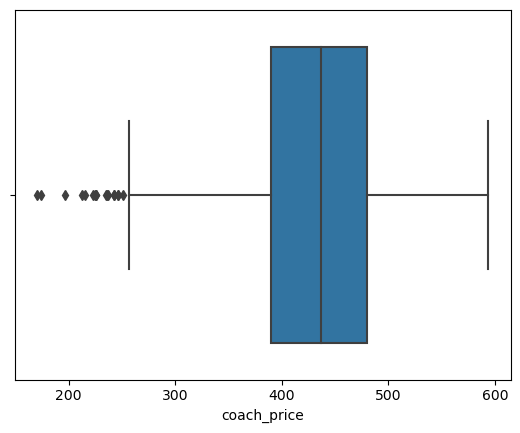

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


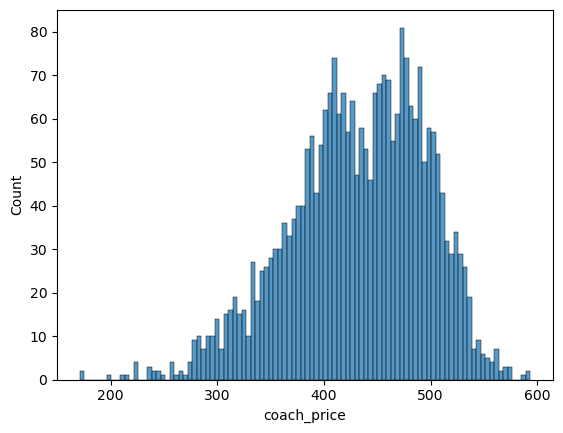

431.834377372817
437.115


<Figure size 640x480 with 0 Axes>

In [15]:
## Task 2
sns.boxplot(x=flight[flight.hours == 8].coach_price)
plt.show()
plt.clf()

sns.histplot(flight[flight.hours == 8].coach_price, bins=100)
plt.show()
plt.clf()

print(np.mean(flight[flight.hours == 8].coach_price))
print(np.median(flight[flight.hours == 8].coach_price))


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

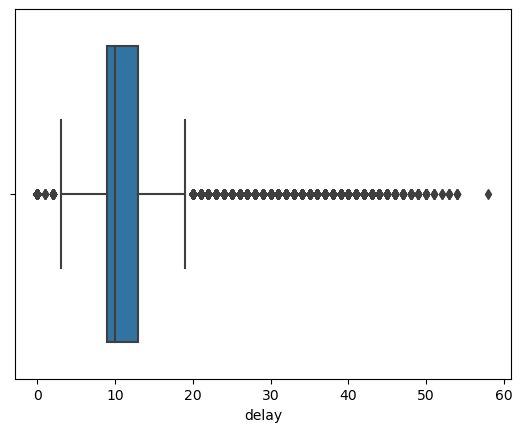

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


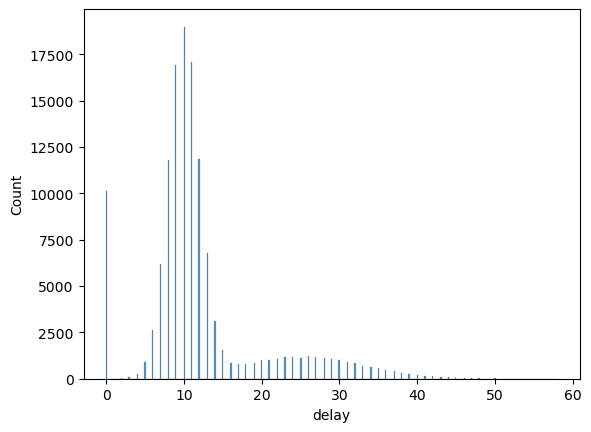

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


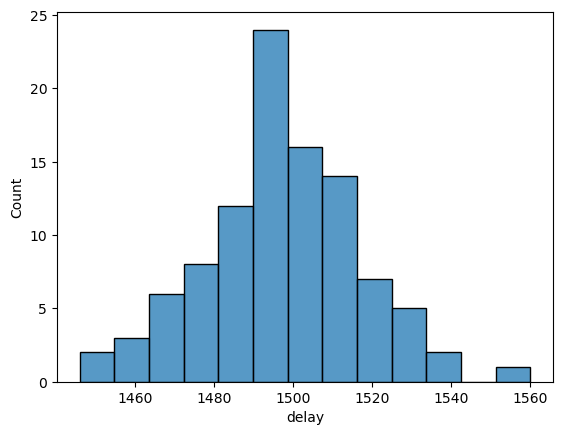

13.162844814301126
10.0


<Figure size 640x480 with 0 Axes>

In [17]:
## Task 3
sns.boxplot(x=flight[flight.delay < 1000].delay)
plt.show()
plt.clf()

sns.histplot(flight[flight.delay < 1000].delay)
plt.show()
plt.clf()

sns.histplot(flight[flight.delay > 1000].delay)
plt.show()
plt.clf()

print(np.mean(flight.delay))
print(np.median(flight.delay))


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

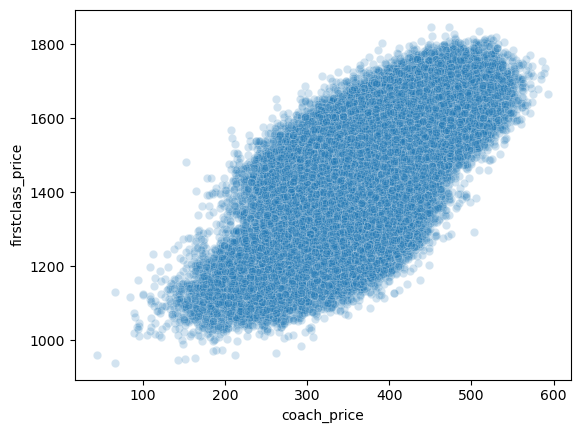

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

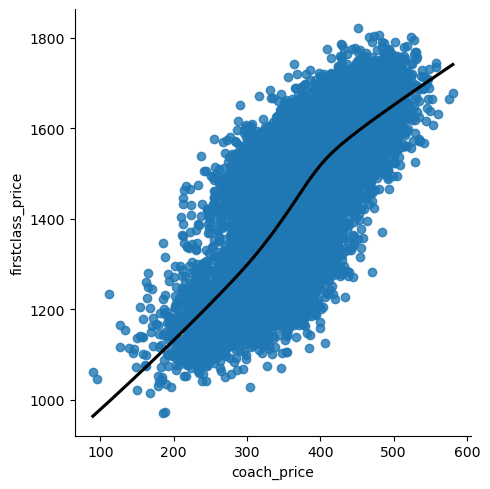

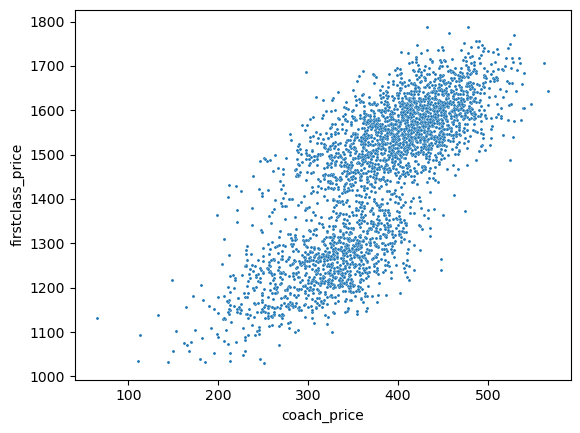

<Figure size 640x480 with 0 Axes>

In [19]:
## Task 4
sns.scatterplot(x=flight.coach_price, y=flight.firstclass_price, alpha = 0.2)
plt.show()
plt.clf()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

# Taking one percent of the population
perc = 0.025
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.scatterplot(x=flight_sub.coach_price, y=flight_sub.firstclass_price, s = 5)
plt.show()
plt.clf()


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

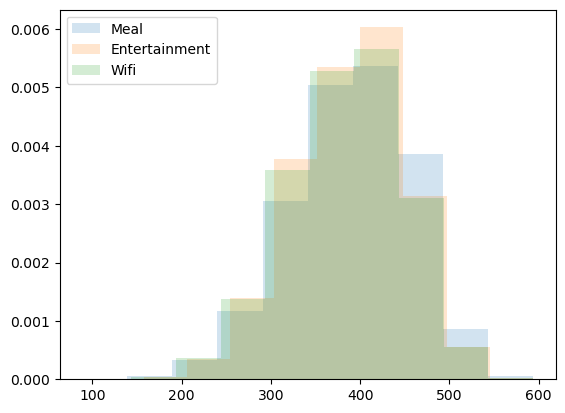

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


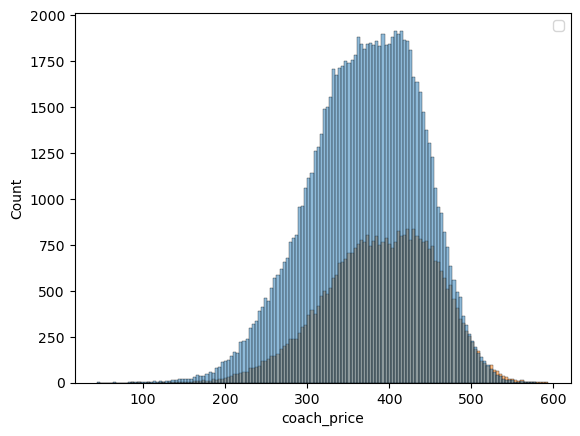

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean of coach_price with meal:  390.09980701619315


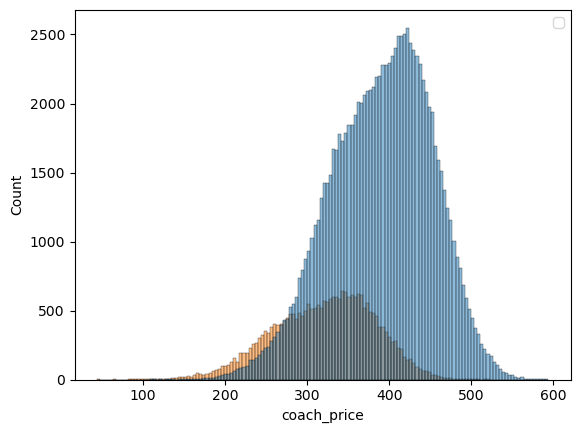

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean of coach_price with entertainment:  390.48814924827946


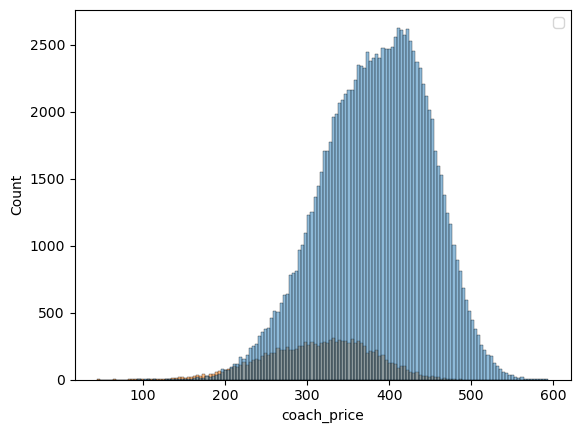

Mean of coach_price with wifi:  383.65137462960104


<Figure size 640x480 with 0 Axes>

In [63]:
## Task 5
plt.hist(flight.coach_price[flight.inflight_meal=='Yes'], label='Meal', density=True, alpha=.2)
plt.hist(flight.coach_price[flight.inflight_entertainment=='Yes'], label='Entertainment', density=True, alpha=.2)
plt.hist(flight.coach_price[flight.inflight_wifi=='Yes'], label='Wifi', density=True, alpha=.2)
plt.legend()
plt.show()

sns.histplot(flight, x='coach_price', hue = flight.inflight_meal)
plt.legend()
plt.show()
plt.clf()
print("Mean of coach_price with meal: ", np.mean(flight.coach_price[flight.inflight_meal=='Yes']))

sns.histplot(flight, x='coach_price', hue = flight.inflight_entertainment)
plt.legend()
plt.show()
plt.clf()
print("Mean of coach_price with entertainment: ", np.mean(flight.coach_price[flight.inflight_entertainment=='Yes']))

sns.histplot(flight, x='coach_price', hue = flight.inflight_wifi)
plt.legend()
plt.show()
plt.clf()
print("Mean of coach_price with wifi: ", np.mean(flight.coach_price[flight.inflight_wifi=='Yes']))


6. How does the number of passengers change in relation to the length of flights?

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


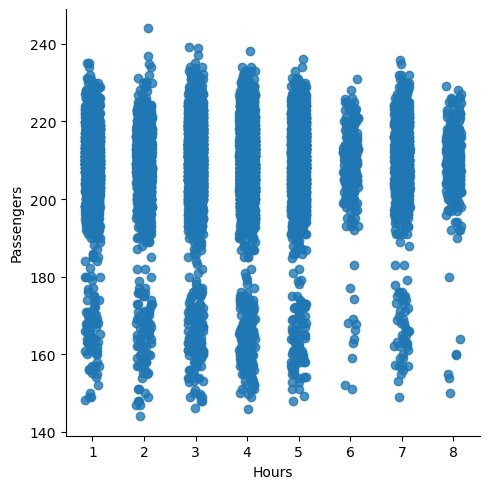

<Figure size 640x480 with 0 Axes>

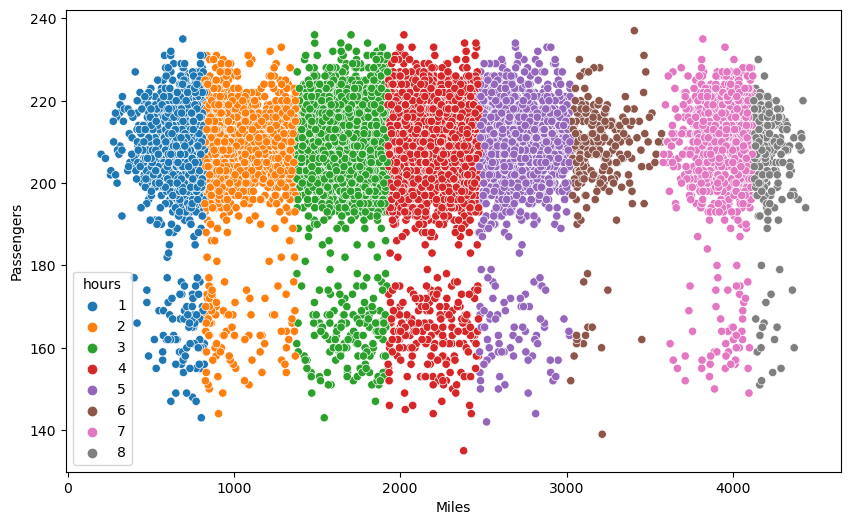

<Figure size 640x480 with 0 Axes>

In [98]:
## Task 6
sns.lmplot(x='hours', y='passengers', data = flight_sub, x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.xlabel("Hours")
plt.ylabel("Passengers")
plt.show()
plt.clf()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", 8)
sns.scatterplot(data=flight_sub, x='miles', y='passengers', hue='hours', hue_order=[1, 2, 3, 4, 5, 6, 7, 8], palette=palette)
plt.xlabel("Miles")
plt.ylabel("Passengers")
plt.show()
plt.clf()



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

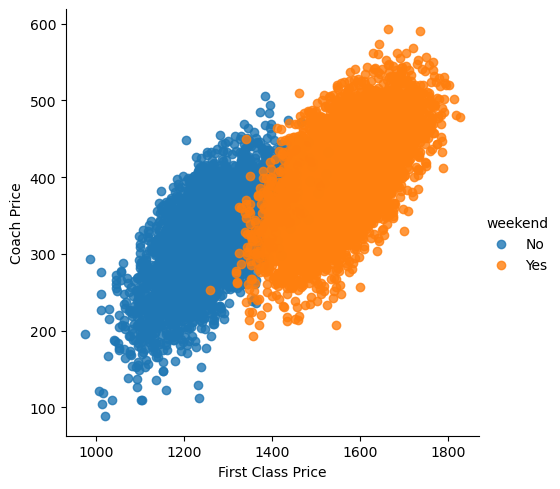

<Figure size 640x480 with 0 Axes>

In [102]:
## Task 7
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

plt.figure(figsize=(10, 6))
sns.lmplot(x='firstclass_price', y='coach_price', data = flight_sub, hue='weekend', hue_order=['No', 'Yes'], x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.xlabel("First Class Price")
plt.ylabel("Coach Price")
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

/var/folders/tx/971fklmn4yl_d4n9vyyy93yw0000gn/T/ipykernel_17146/1596208253.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = flight.groupby('day_of_week')
/var/folders/tx/971fklmn4yl_d4n9vyyy93yw0000gn/T/ipykernel_17146/1596208253.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar(no_readeyes, flight_redeye.groupby('day_of_week').coach_price.mean(), label='Red Eye')
/var/folders/tx/971fklmn4yl_d4n9vyyy93yw0000gn/T/ipykernel_17146/1596208253.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

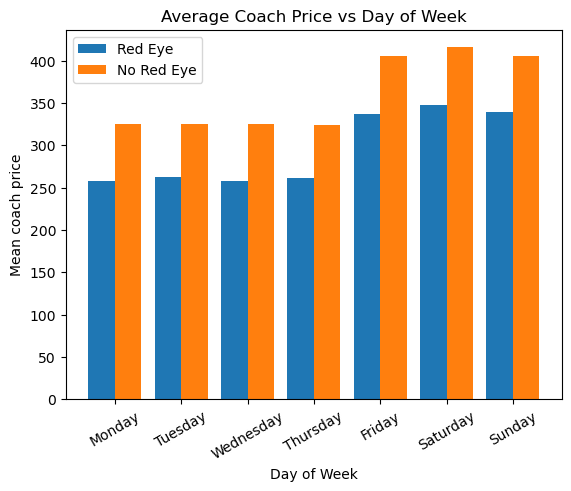

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


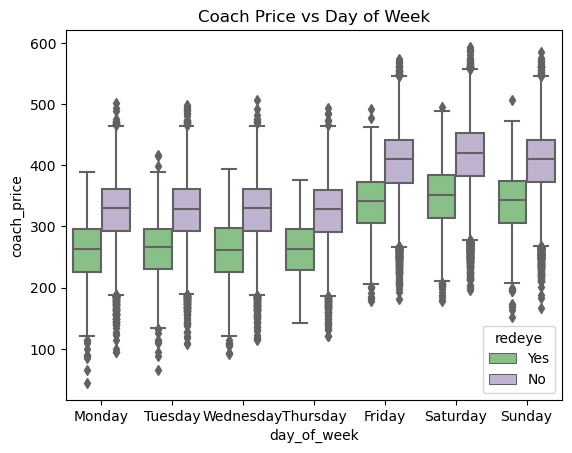

<Figure size 640x480 with 0 Axes>

In [128]:
## Task 8
def create_array(n, t, d, w):
    #     n = 1  This is our first dataset (out of 2)
    #     t = 2 Number of datasets
    #     d = 7 Number of sets of bars
    #     w = 0.8 Width of each bar
    return [t*element + w*n for element
                 in range(d)]
# print(flight.head())
days_in_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert day_of_week to a categorical type with ordered categories
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], categories=days_in_order, ordered=True)

# Now perform the groupby
grouped = flight.groupby('day_of_week')

no_readeyes = create_array(1, 2, 7, 0.8) # for no redeyes, 2 datasets(no and yes redeyes) with...
                                         # 7 bars (7 days week) and a width of 0.8
readeyes = create_array(2, 2, 7, 0.8)
days = create_array(1.5, 2, 7, 0.8)

flight_redeye = flight[flight.redeye == 'Yes']
flight_noredeye = flight[flight.redeye == 'No']

plt.bar(no_readeyes, flight_redeye.groupby('day_of_week').coach_price.mean(), label='Red Eye')
plt.bar(readeyes, flight_noredeye.groupby('day_of_week').coach_price.mean(), label='No Red Eye')

ax = plt.subplot()
ax.set_xticks(days)
ax.set_xticklabels(days_in_order)
plt.xticks(rotation = 30)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Mean coach price')
plt.title('Average Coach Price vs Day of Week')

plt.show()
plt.clf()


sns.boxplot(x='day_of_week', y='coach_price', hue="redeye", data=flight, palette='Accent')
plt.title('Coach Price vs Day of Week')
plt.show()
plt.clf()
